##                     **Boiling Point Prediction Using Machine Learning**

### 1️⃣ Title & Project Overview

**Title**

Chemical Property Prediction Using Machine Learning
Boiling Point Prediction of Organic Compounds

**Overview**

Briefly explain:

What boiling point is

Why it matters in chemistry

Why AI is useful for this problem

### 2️⃣ Problem Statement

The objective of this project is to develop a machine learning model that predicts the boiling point of organic compounds using chemically meaningful molecular descriptors.

### 4️⃣ Import Required Libraries (Code)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


### 5️⃣ Load the Dataset

In [68]:
df = pd.read_csv("D:\Zeeshan Raza\python leqrning\physical_chemical_properties_of_organic_substances.csv")
df.head()
                 

<>:1: SyntaxWarning: "\Z" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\Z"? A raw string is also an option.
<>:1: SyntaxWarning: "\Z" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\Z"? A raw string is also an option.
C:\Users\hp\AppData\Local\Temp\ipykernel_10652\2480190937.py:1: SyntaxWarning: "\Z" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\Z"? A raw string is also an option.
  df = pd.read_csv("D:\Zeeshan Raza\python leqrning\physical_chemical_properties_of_organic_substances.csv")


,name,formula,CAS,smiles,InChI,InChIKey,molecular_weight,melting_point_K,boiling_point_K,heat_of_fusion,...,is_anhydride,is_acyl_halide,is_carbonate,is_carboxylate,is_hydroperoxide,is_peroxide,is_orthoester,is_methylenedioxy,is_orthocarbonate_ester,is_carboxylic_anhydride
0,ammonia,H3N,7664-41-7,N,InChI=1S/H3N/h1H3,QGZKDVFQNNGYKY-UHFFFAOYSA-N,17.030520,195.45,239.834319,332344.520308,...,False,False,False,False,False,False,False,False,False,False
1,"1,4-benzodioxane-2-carboxylic acid",C9H8O4,3663-80-7,O=C(O)C1COc2ccccc2O1,InChI=1S/C9H8O4/c10-9(11)8-5-12-6-3-1-2-4-7(6)...,HMBHAQMOBKLWRX-UHFFFAOYSA-N,180.157420,389.65,647.600000,193464.138196,...,False,False,False,False,False,False,False,False,False,False
2,acetylene,C2H2,74-86-2,C#C,InChI=1S/C2H2/c1-2/h1-2H,HSFWRNGVRCDJHI-UHFFFAOYSA-N,26.037280,192.40,189.000350,144561.951172,...,False,False,False,False,False,False,False,False,False,False
3,adenosine triphosphate,C10H16N5O13P3,56-65-5,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15(...,ZKHQWZAMYRWXGA-KQYNXXCUSA-N,507.181023,449.15,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,rhodizonic acid,C6H2O6,118-76-3,O=c1c(O)c(O)c(=O)c(=O)c1=O,InChI=1S/C6H2O6/c7-1-2(8)4(10)6(12)5(11)3(1)9/...,WCJLIWFWHPOTAC-UHFFFAOYSA-N,170.076480,521.15,792.780000,75777.673668,...,False,False,False,False,False,False,False,False,False,False


In [159]:
df.head(6)

,molecular_weight,melting_point_K,boiling_point_K,critical_temperature,critical_pressure,kingdom,superclass,class,direct_parent,substituents,...,is_anhydride,is_acyl_halide,is_carbonate,is_carboxylate,is_hydroperoxide,is_peroxide,is_orthoester,is_methylenedioxy,is_orthocarbonate_ester,is_carboxylic_anhydride
0,17.03052,195.45,239.834319,405.56000,11363400.0,Inorganic compounds,Homogeneous non-metal compounds,Homogeneous other non-metal compounds,Homogeneous other non-metal compounds,"[""Homogeneous other non metal""]",...,False,False,False,False,False,False,False,False,False,False
1,180.15742,389.65,647.600000,891.16869,4216562.7,Organic compounds,Organoheterocyclic compounds,Benzodioxanes,"Benzo-1,4-dioxanes","[""Benzo-1,4-dioxane"", ""Alkyl aryl ether"", ""Ben...",...,False,False,False,False,False,False,False,False,False,False
2,26.03728,192.40,189.000350,308.30000,5988200.0,Organic compounds,Acetylides,NaN,Acetylides,"[""Acetylide"", ""Unsaturated aliphatic hydrocarb...",...,False,False,False,False,False,False,False,False,False,False
4,170.07648,521.15,792.780000,1083.97020,8541722.9,Organic compounds,Organic oxygen compounds,Organooxygen compounds,P-benzoquinones,"[""P-benzoquinone"", ""O-benzoquinone"", ""M-benzoq...",...,False,False,False,False,False,False,False,False,False,False
5,176.12412,450.65,717.260000,894.20891,5351345.2,Organic compounds,Organoheterocyclic compounds,Lactones,Gamma butyrolactones,"[""Gamma butyrolactone"", ""Tetrahydrofuran"", ""Al...",...,False,False,False,False,False,False,False,False,False,False
6,135.20622,301.67,460.650000,673.00000,3000000.0,Organic compounds,Organoheterocyclic compounds,Pyridines and derivatives,Pyridines and derivatives,"[""Pyridine"", ""Heteroaromatic compound"", ""Azacy...",...,False,False,False,False,False,False,False,False,False,False


In [69]:
df.shape

(4343, 48)

In [70]:
df.isna().sum()


name                          0
formula                       0
CAS                           0
smiles                       12
InChI                         0
InChIKey                     12
molecular_weight              0
melting_point_K               0
boiling_point_K             709
heat_of_fusion              987
heat_of_vaporization       2520
critical_temperature        824
critical_pressure           842
flash_point                4070
logP                       3634
improved_name                48
kingdom                       3
superclass                    4
class                        25
direct_parent                 3
substituents                  3
is_organic                   12
is_radionuclide              12
is_hydrocarbon               12
is_alkane                    12
is_cycloalkane               12
is_branched_alkane           12
is_alkene                    12
is_alkyne                    12
is_aromatic                  12
is_alcohol                   12
is_polyo

### 6️⃣ Data Preprocessing

In [71]:
# 
df = df.dropna(subset=["boiling_point_K"])
df.head()


,name,formula,CAS,smiles,InChI,InChIKey,molecular_weight,melting_point_K,boiling_point_K,heat_of_fusion,...,is_anhydride,is_acyl_halide,is_carbonate,is_carboxylate,is_hydroperoxide,is_peroxide,is_orthoester,is_methylenedioxy,is_orthocarbonate_ester,is_carboxylic_anhydride
0,ammonia,H3N,7664-41-7,N,InChI=1S/H3N/h1H3,QGZKDVFQNNGYKY-UHFFFAOYSA-N,17.03052,195.45,239.834319,332344.520308,...,False,False,False,False,False,False,False,False,False,False
1,"1,4-benzodioxane-2-carboxylic acid",C9H8O4,3663-80-7,O=C(O)C1COc2ccccc2O1,InChI=1S/C9H8O4/c10-9(11)8-5-12-6-3-1-2-4-7(6)...,HMBHAQMOBKLWRX-UHFFFAOYSA-N,180.15742,389.65,647.600000,193464.138196,...,False,False,False,False,False,False,False,False,False,False
2,acetylene,C2H2,74-86-2,C#C,InChI=1S/C2H2/c1-2/h1-2H,HSFWRNGVRCDJHI-UHFFFAOYSA-N,26.03728,192.40,189.000350,144561.951172,...,False,False,False,False,False,False,False,False,False,False
4,rhodizonic acid,C6H2O6,118-76-3,O=c1c(O)c(O)c(=O)c(=O)c1=O,InChI=1S/C6H2O6/c7-1-2(8)4(10)6(12)5(11)3(1)9/...,WCJLIWFWHPOTAC-UHFFFAOYSA-N,170.07648,521.15,792.780000,75777.673668,...,False,False,False,False,False,False,False,False,False,False
5,glucuronolactone,C6H8O6,32449-92-6,O=C[C@H](O)[C@H]1OC(=O)[C@@H](O)[C@H]1O,InChI=1S/C6H8O6/c7-1-2(8)5-3(9)4(10)6(11)12-5/...,UYUXSRADSPPKRZ-SKNVOMKLSA-N,176.12412,450.65,717.260000,153142.000085,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df.isna().sum()


name                          0
formula                       0
CAS                           0
smiles                       10
InChI                         0
InChIKey                     10
molecular_weight              0
melting_point_K               0
boiling_point_K               0
heat_of_fusion              403
heat_of_vaporization       1811
critical_temperature        123
critical_pressure           141
flash_point                3364
logP                       3001
improved_name                48
kingdom                       3
superclass                    4
class                        23
direct_parent                 3
substituents                  3
is_organic                   10
is_radionuclide              10
is_hydrocarbon               10
is_alkane                    10
is_cycloalkane               10
is_branched_alkane           10
is_alkene                    10
is_alkyne                    10
is_aromatic                  10
is_alcohol                   10
is_polyo

In [73]:
print(df.columns.tolist())


['name', 'formula', 'CAS', 'smiles', 'InChI', 'InChIKey', 'molecular_weight', 'melting_point_K', 'boiling_point_K', 'heat_of_fusion', 'heat_of_vaporization', 'critical_temperature', 'critical_pressure', 'flash_point', 'logP', 'improved_name', 'kingdom', 'superclass', 'class', 'direct_parent', 'substituents', 'is_organic', 'is_radionuclide', 'is_hydrocarbon', 'is_alkane', 'is_cycloalkane', 'is_branched_alkane', 'is_alkene', 'is_alkyne', 'is_aromatic', 'is_alcohol', 'is_polyol', 'is_ketone', 'is_aldehyde', 'is_carboxylic_acid', 'is_ether', 'is_phenol', 'is_ester', 'is_anhydride', 'is_acyl_halide', 'is_carbonate', 'is_carboxylate', 'is_hydroperoxide', 'is_peroxide', 'is_orthoester', 'is_methylenedioxy', 'is_orthocarbonate_ester', 'is_carboxylic_anhydride']


### 7️⃣**Drop Coloumns That Are not Need**

In [74]:
df = df.drop(columns=[
    'name','formula','CAS','InChI','smiles','InChIKey','improved_name','heat_of_fusion','heat_of_vaporization','flash_point','logP'

])

#ML needs numbers, not IDs or names.

### 8️⃣**Drop Duplicates Values**

In [81]:
df.drop_duplicates(inplace=True)


### 9️⃣ **Drop Outliers Values**

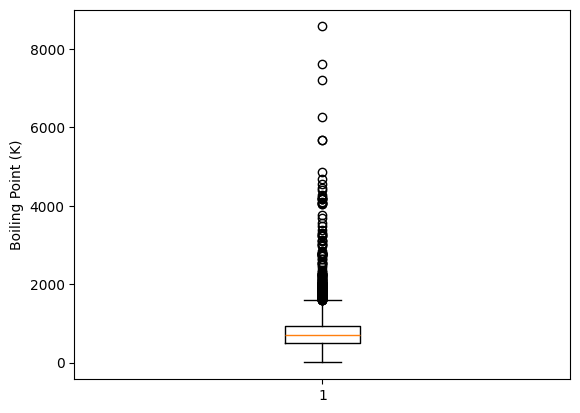

In [84]:
plt.boxplot(df['boiling_point_K'])
plt.ylabel("Boiling Point (K)")
plt.show()


In [89]:
Q1 = df['boiling_point_K'].quantile(0.25)
Q3 = df['boiling_point_K'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

df = df[df['boiling_point_K'] <= upper_limit]


In [90]:
df.head()


,molecular_weight,melting_point_K,boiling_point_K,critical_temperature,critical_pressure,kingdom,superclass,class,direct_parent,substituents,...,is_anhydride,is_acyl_halide,is_carbonate,is_carboxylate,is_hydroperoxide,is_peroxide,is_orthoester,is_methylenedioxy,is_orthocarbonate_ester,is_carboxylic_anhydride
0,17.03052,195.45,239.834319,405.56000,11363400.0,Inorganic compounds,Homogeneous non-metal compounds,Homogeneous other non-metal compounds,Homogeneous other non-metal compounds,"[""Homogeneous other non metal""]",...,False,False,False,False,False,False,False,False,False,False
1,180.15742,389.65,647.600000,891.16869,4216562.7,Organic compounds,Organoheterocyclic compounds,Benzodioxanes,"Benzo-1,4-dioxanes","[""Benzo-1,4-dioxane"", ""Alkyl aryl ether"", ""Ben...",...,False,False,False,False,False,False,False,False,False,False
2,26.03728,192.40,189.000350,308.30000,5988200.0,Organic compounds,Acetylides,NaN,Acetylides,"[""Acetylide"", ""Unsaturated aliphatic hydrocarb...",...,False,False,False,False,False,False,False,False,False,False
4,170.07648,521.15,792.780000,1083.97020,8541722.9,Organic compounds,Organic oxygen compounds,Organooxygen compounds,P-benzoquinones,"[""P-benzoquinone"", ""O-benzoquinone"", ""M-benzoq...",...,False,False,False,False,False,False,False,False,False,False
5,176.12412,450.65,717.260000,894.20891,5351345.2,Organic compounds,Organoheterocyclic compounds,Lactones,Gamma butyrolactones,"[""Gamma butyrolactone"", ""Tetrahydrofuran"", ""Al...",...,False,False,False,False,False,False,False,False,False,False


In [91]:
df.isna().sum()


molecular_weight            0
melting_point_K             0
boiling_point_K             0
critical_temperature       71
critical_pressure          84
kingdom                     3
superclass                  3
class                      22
direct_parent               3
substituents                3
is_organic                 10
is_radionuclide            10
is_hydrocarbon             10
is_alkane                  10
is_cycloalkane             10
is_branched_alkane         10
is_alkene                  10
is_alkyne                  10
is_aromatic                10
is_alcohol                 10
is_polyol                  10
is_ketone                  10
is_aldehyde                10
is_carboxylic_acid         10
is_ether                   10
is_phenol                  10
is_ester                   10
is_anhydride               10
is_acyl_halide             10
is_carbonate               10
is_carboxylate             10
is_hydroperoxide           10
is_peroxide                10
is_orthoes

---------------------------------------------------------------------------------------------------------------

## 🔟**Defining Featuers And Targets**

In [93]:
X = df.drop(columns=['boiling_point_K'])
y = df['boiling_point_K']


In [99]:
X.shape

#y.shape

(3323, 36)

In [102]:
X.head()

,molecular_weight,melting_point_K,critical_temperature,critical_pressure,kingdom,superclass,class,direct_parent,substituents,is_organic,...,is_anhydride,is_acyl_halide,is_carbonate,is_carboxylate,is_hydroperoxide,is_peroxide,is_orthoester,is_methylenedioxy,is_orthocarbonate_ester,is_carboxylic_anhydride
0,17.03052,195.45,405.56000,11363400.0,Inorganic compounds,Homogeneous non-metal compounds,Homogeneous other non-metal compounds,Homogeneous other non-metal compounds,"[""Homogeneous other non metal""]",False,...,False,False,False,False,False,False,False,False,False,False
1,180.15742,389.65,891.16869,4216562.7,Organic compounds,Organoheterocyclic compounds,Benzodioxanes,"Benzo-1,4-dioxanes","[""Benzo-1,4-dioxane"", ""Alkyl aryl ether"", ""Ben...",True,...,False,False,False,False,False,False,False,False,False,False
2,26.03728,192.40,308.30000,5988200.0,Organic compounds,Acetylides,NaN,Acetylides,"[""Acetylide"", ""Unsaturated aliphatic hydrocarb...",True,...,False,False,False,False,False,False,False,False,False,False
4,170.07648,521.15,1083.97020,8541722.9,Organic compounds,Organic oxygen compounds,Organooxygen compounds,P-benzoquinones,"[""P-benzoquinone"", ""O-benzoquinone"", ""M-benzoq...",True,...,False,False,False,False,False,False,False,False,False,False
5,176.12412,450.65,894.20891,5351345.2,Organic compounds,Organoheterocyclic compounds,Lactones,Gamma butyrolactones,"[""Gamma butyrolactone"", ""Tetrahydrofuran"", ""Al...",True,...,False,False,False,False,False,False,False,False,False,False


In [100]:
y.shape

(3323,)

In [104]:
y.head()

0    239.834319
1    647.600000
2    189.000350
4    792.780000
5    717.260000
Name: boiling_point_K, dtype: float64

## **Split data into training and testing sets**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,  # 20% of data is for testing
    random_state=42 )

In [114]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape


((2658,), (665,))

## **Feature Scaling**

will added when needed

## **Train Linear Regression**

In [118]:
model = LinearRegression()


In [126]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # keep y aligned with X

X_test = X_test.dropna()
y_test = y_test[X_test.index]    # keep y aligned with X


In [127]:
X_train = X_train.drop(columns=['kingdom', 'superclass', 'class', 'direct_parent', 'substituents'], errors='ignore')
X_test  = X_test.drop(columns=['kingdom', 'superclass', 'class', 'direct_parent', 'substituents'], errors='ignore')


In [128]:
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## **Predict and Evaluate**

In [131]:
y_pred = model.predict(X_test)


In [132]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 90.7857102398755
RMSE: 132.2287951273966
R²: 0.7628619155494483


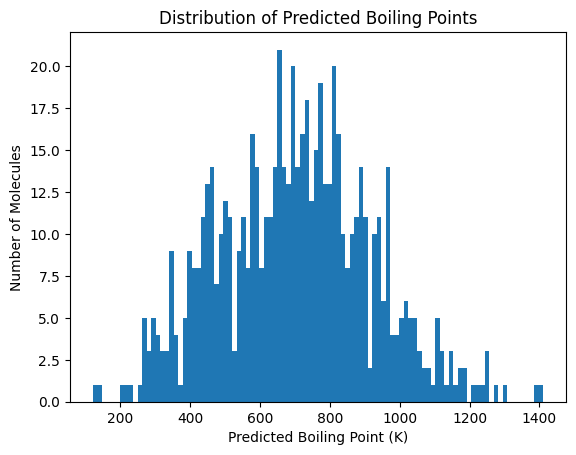

In [139]:
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=100)
plt.xlabel("Predicted Boiling Point (K)")
plt.ylabel("Number of Molecules")
plt.title("Distribution of Predicted Boiling Points")
plt.show()


## **This section allows predicting the "B.P" of a new molecule by providing its molecular weight,M.P, critical properties, and functional groups**

In [153]:
# Make sure new molecule has exactly the same columns as training
feature_cols = X_train.columns  # your original training features
feature_cols = feature_cols.drop('num_functional_groups', errors='ignore')  # drop if it exists

# Create new molecule dictionary with all columns
new_mol_dict = dict.fromkeys(feature_cols, 0)
new_mol_dict['molecular_weight'] = 180
new_mol_dict['melting_point_K'] = 250
new_mol_dict['critical_temperature'] = 550
new_mol_dict['critical_pressure'] = 20.5
new_mol_dict['is_aromatic'] = 1
# fill other binary features as needed

new_molecule = pd.DataFrame([new_mol_dict])

# Predict
predicted_bp = model.predict(new_molecule)
print("Predicted Boiling Point (K):", predicted_bp[0])


Predicted Boiling Point (K): 474.69893725971446


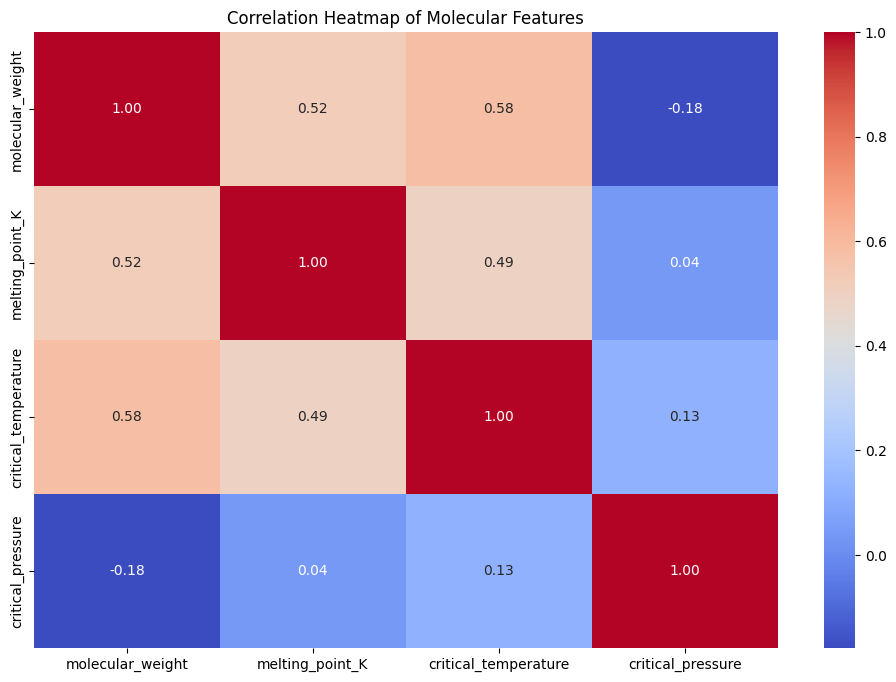

KeyError: "None of [Index(['boiling_point_K'], dtype='object')] are in the [columns]"

<Figure size 600x800 with 0 Axes>

In [155]:
# ==============================
# 🔹 Heatmap of Molecular Features
# ==============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Select numeric columns from your training data
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# 2️⃣ Compute correlation matrix
corr_matrix = X_train[numeric_cols].corr()

# 3️⃣ Plot full heatmap
plt.figure(figsize=(12, 8))  # adjust size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Molecular Features")
plt.show()

# 4️⃣ Optional: Heatmap only with correlation to boiling point
plt.figure(figsize=(6, 8))
sns.heatmap(corr_matrix[['boiling_point_K']].sort_values(by='boiling_point_K', ascending=False),
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation with Boiling Point")
plt.show()


-------------------------------------------------------------------------------------------------------------------